Column Names in Dataset: Index(['Year', 'Value'], dtype='object')


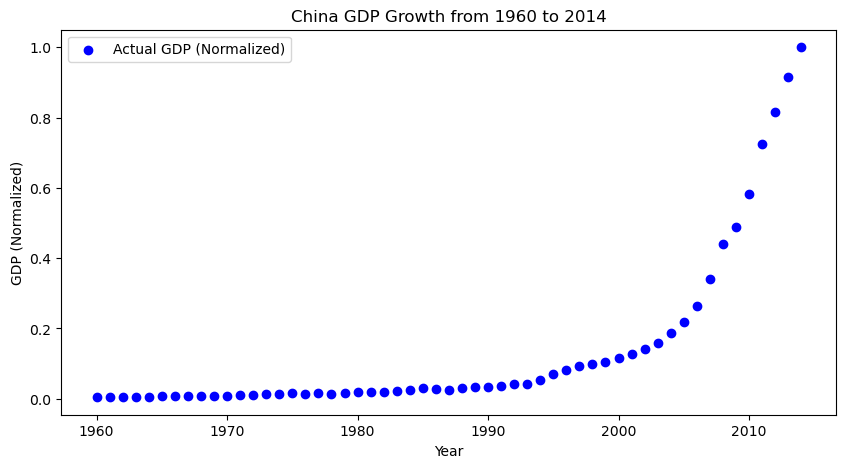

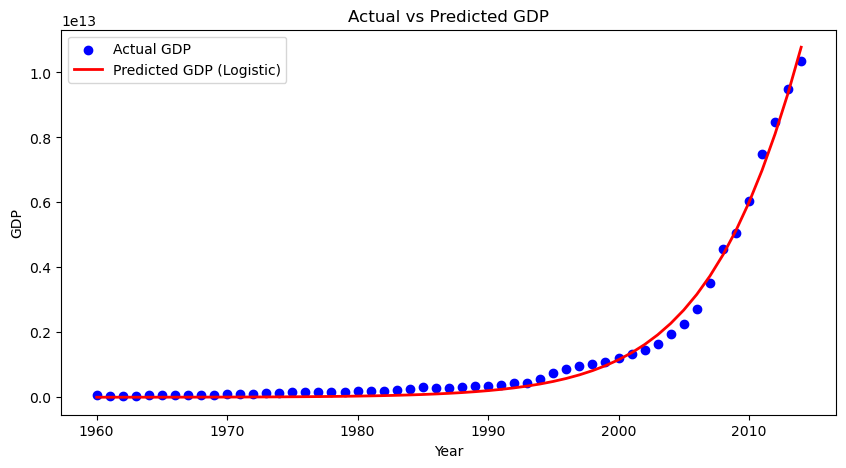

Optimized Parameters: a=0.1752, b=2021.3700, c=4.8272
Final R² Score: 0.9938


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv('china_gdp.csv')

# Check column names
print("Column Names in Dataset:", df.columns)

# Extract year and GDP values
X = df['Year'].values  # Feature (Year)
y = df['Value'].values  # Target (GDP)

# Normalize GDP values for better curve fitting
y_max = np.max(y)
y = y / y_max  # Scale GDP values between 0 and 1

# Visualizing the dataset
plt.figure(figsize=(10,5))
plt.scatter(X, y, color='blue', label='Actual GDP (Normalized)')
plt.xlabel('Year')
plt.ylabel('GDP (Normalized)')
plt.title('China GDP Growth from 1960 to 2014')
plt.legend()
plt.show()

# Define Logistic Growth Function
def logistic_function(x, a, b, c):
    return c / (1 + np.exp(-a * (x - b)))

# Provide initial parameter guesses to help curve_fit()
initial_guesses = [0.1, 2000, 1]

# Curve Fitting using scipy.optimize.curve_fit()
popt, _ = curve_fit(logistic_function, X, y, p0=initial_guesses, maxfev=50000)

# Extract optimized parameters
a_opt, b_opt, c_opt = popt

# Generate predictions
y_pred = logistic_function(X, a_opt, b_opt, c_opt)

# Denormalize predictions
y_pred = y_pred * y_max

# Compute R² Score
r2 = r2_score(df['Value'], y_pred)

# Plot Actual vs Predicted GDP
plt.figure(figsize=(10,5))
plt.scatter(df['Year'], df['Value'], color='blue', label='Actual GDP')
plt.plot(df['Year'], y_pred, color='red', linewidth=2, label='Predicted GDP (Logistic)')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Actual vs Predicted GDP')
plt.legend()
plt.show()

print(f"Optimized Parameters: a={a_opt:.4f}, b={b_opt:.4f}, c={c_opt:.4f}")
print(f"Final R² Score: {r2:.4f}")


saikat


Optimized Parameters: a=0.1752, b=2021.3700, c=4.8272
R² Score: 0.9938


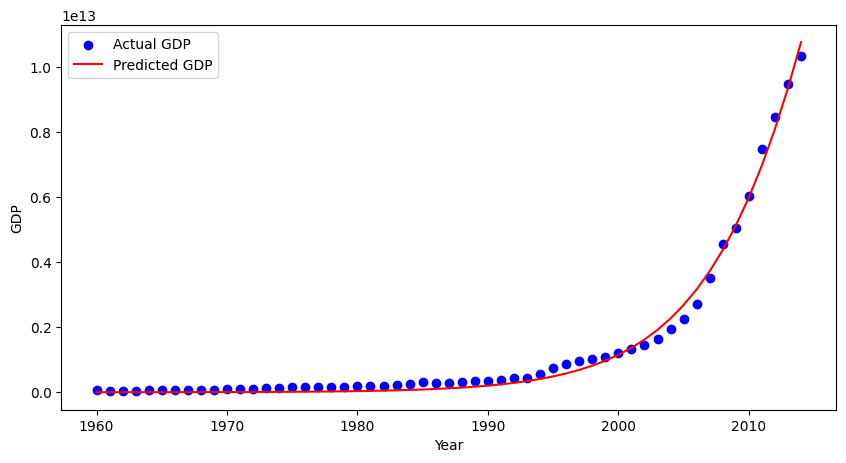

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv('china_gdp.csv')
years, gdp = df['Year'].values, df['Value'].values

# Normalize GDP
gdp_norm = gdp / np.max(gdp)

# Define logistic function
logistic = lambda x, a, b, c: c / (1 + np.exp(-a * (x - b)))

# Fit model
params, _ = curve_fit(logistic, years, gdp_norm, p0=[0.1, 2000, 1], maxfev=50000)
a, b, c = params

# Predict and denormalize
gdp_pred = logistic(years, a, b, c) * np.max(gdp)

# Evaluate
r2 = r2_score(gdp, gdp_pred)
print(f"Optimized Parameters: a={a:.4f}, b={b:.4f}, c={c:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot
plt.figure(figsize=(10,5))
plt.scatter(years, gdp, color='blue', label='Actual GDP')
plt.plot(years, gdp_pred, color='red', label='Predicted GDP')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.show()